In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

img = cv2.imread('digits.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

'''
0이 500개, 1이 500개, ..., 10이 500개
총 5000개의 글자가 있음

0은 가로 5 x 세로 100을 차지하고 있음
픽셀로 따지면 가로는 0~100픽셀, 세로는 0~2000픽셀
'''

# 세로로 50줄, 가로로 100줄로 사진을 나눕니다.
cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]
x = np.array(cells)
print(x.shape)

# 각 (20 X 20) 크기의 사진을 한 줄(1 X 400)으로 바꿉니다.
train = x[:, :].reshape(-1, 400).astype(np.float32)
print(train.shape)

# 0이 500개, 1이 500개, ... 로 총 5,000개가 들어가는 (1 x 5000) 배열을 만듭니다.
k = np.arange(10)
train_labels = np.repeat(k, 500)[:, np.newaxis]
print(train_labels.shape)




(50, 100, 20, 20)
(5000, 400)
(5000, 1)


In [2]:
len(train), len(train_labels)

(5000, 5000)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.3)

In [5]:
X_train.shape

(3500, 400)

In [6]:
X_test.shape

(1500, 400)

In [7]:
y_train.shape

(3500, 1)

In [8]:
y_test.shape

(1500, 1)

In [9]:
y_test = y_test.ravel()
y_test.shape

(1500,)

In [10]:
y_train = y_train.ravel()
y_train.shape

(3500,)

### SVM 정확도

In [37]:
svm = SVC(C=1.0, gamma=0.1)
model = svm.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(round(score,3))

0.088


https://yeoulcoding.me/106

SVM 같은 경우에는 feature scale에 민감하게 영향을 받음. 스케일이 작은 특성이 완전히 무시됨. 그래서 8%라는 값이 나온듯

standard scaler 사용해보자

In [47]:
len(train), len(train_labels)

(5000, 5000)

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.3)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float32))

In [49]:
y_test = y_test.ravel()
y_test.shape

(1500,)

In [50]:
y_train = y_train.ravel()
y_train.shape

(3500,)

In [51]:
svm = SVC(C=1.0, gamma=0.1)
model = svm.fit(X_train_scaled, y_train)

score = model.score(X_test_scaled, y_test)
print(round(score,3))

0.183


https://stackoverflow.com/questions/45384185/what-is-the-difference-between-linearsvc-and-svckernel-linear

LinearSVC랑 SVC의 차이점

In [57]:
from sklearn.svm import LinearSVC

lin_clf = LinearSVC(C = 0.1, max_iter = 100000, random_state=42)
lin_clf.fit(X_train_scaled, y_train)

score = lin_clf.score(X_test_scaled, y_test)

print(round(score,3))

0.872


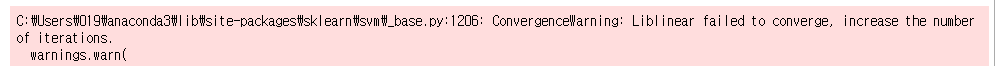

https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=gdpresent&logNo=221717231990&parentCategoryNo=&categoryNo=61&viewDate=&isShowPopularPosts=false&from=postView

이 에러가 뜨면 max iter을 증가시켜보자

In [44]:
y_pred[:100]

array([5, 1, 8, 8, 1, 2, 0, 1, 2, 3, 6, 6, 7, 3, 4, 0, 6, 8, 0, 1])

In [45]:
y_test[:100]

array([1, 3, 1, 1, 3, 9, 5, 3, 6, 1, 0, 8, 1, 1, 9, 0, 5, 5, 3, 7])

### 트리 정확도

In [18]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
tree = dt.fit(X_train, y_train)
score = tree.score(X_test, y_test)
print(round(score,3))

0.799


### knn 정확도

In [19]:
# n=1
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)

neigh.fit(X_train, y_train)

score = neigh.score(X_test, y_test)
print(round(score,3))

0.943


In [20]:
# n=2
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)

neigh.fit(X_train, y_train)

score = neigh.score(X_test, y_test)
print(round(score,3))

0.933


In [21]:
# n =3
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

score = neigh.score(X_test, y_test)
print(round(score,3))

0.94


In [22]:
# n =4
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)

neigh.fit(X_train, y_train)

score = neigh.score(X_test, y_test)
print(round(score,3))

0.94


In [23]:
# n =5
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(X_train, y_train)

score = neigh.score(X_test, y_test)
print(round(score,3))

0.942


### 로지스틱 회귀

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
LR = model.fit(X_train, y_train)

score = LR.score(X_test, y_test)
print(round(score,3))

0.873


C:\Users\019\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
